In [1]:
# 비지도 : 군집분류 : kmeans
# 강화학습 : 영상처리 : gen ...
# 자연어, 시계열 : RNN 

In [2]:
from sklearn.cluster import KMeans  # 비지도 : 군집분류
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import mglearn

### plot.kmeans_algorithm()

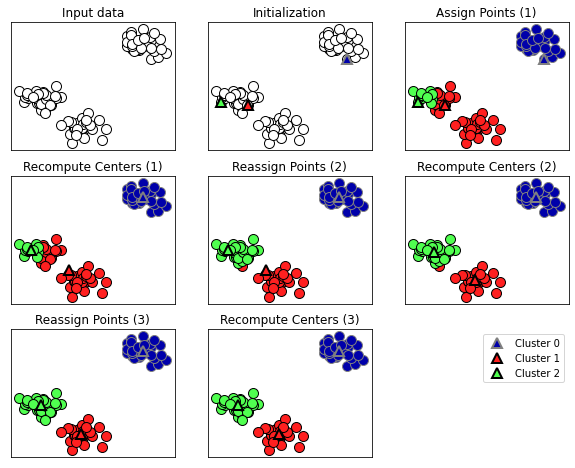

In [3]:
mglearn.plots.plot_kmeans_algorithm() #특성데이터만 있는 상태. 군집분류 가능.
# 임의의 cluster 지정, 반경으로 군집으로 묶고
# 각 군집의 센터로 보냄
# 다시 반경 내에서 군집으로 설정
# 다시 센터
# 반복 ....

### 데이터 읽어오기

In [5]:
df = pd.read_csv('data5/kmean.csv',index_col='Unnamed: 0')
df

,x,y
0,2,3
1,2,11
2,2,18
3,4,5
4,4,7
5,5,3
6,5,15
7,6,6
8,6,8
9,6,9


 scatter 찍어보기

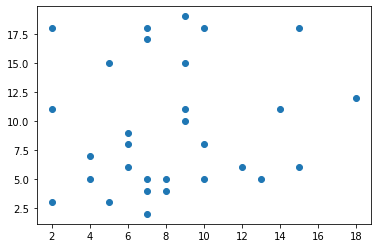

In [6]:
plt.scatter(df['x'], df['y'])
plt.show()

## 비지도학습(군집분류)

In [7]:
#     n_clusters=8 
k = KMeans( n_clusters=4 ) # 4개 군집으로 분류하겠다.
km = k.fit( df )

In [8]:
type(km)

sklearn.cluster._kmeans.KMeans

km.cluster_centers_ 확인

In [9]:
cen = km.cluster_centers_
cen

array([[ 5.53846154,  5.53846154],
       [ 7.        , 17.14285714],
       [11.14285714,  7.28571429],
       [15.66666667, 13.66666667]])

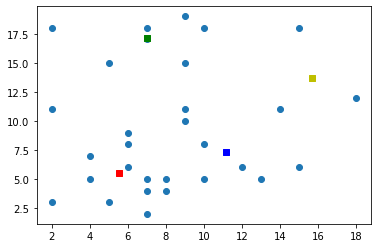

In [10]:
plt.scatter(df['x'], df['y'])
plt.scatter( cen[:,0],cen[:,1],marker='s', c=['r','g','b','y']) # 중앙지점을 찍어봄 4개.
plt.show()

In [11]:
km.labels_

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 1, 1, 2,
       2, 1, 2, 2, 3, 2, 3, 3])

df에 labels 추가하기

In [12]:
df['labels'] = km.labels_

In [13]:
df

,x,y,labels
0,2,3,0
1,2,11,0
2,2,18,1
3,4,5,0
4,4,7,0
5,5,3,0
6,5,15,1
7,6,6,0
8,6,8,0
9,6,9,0


## pairplot 그려보기
- 분류쪽은 꼭 pairplot을 그려봐야함.

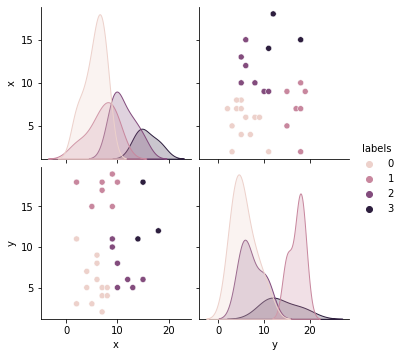

In [14]:
sns.pairplot(df, hue='labels')
plt.show()

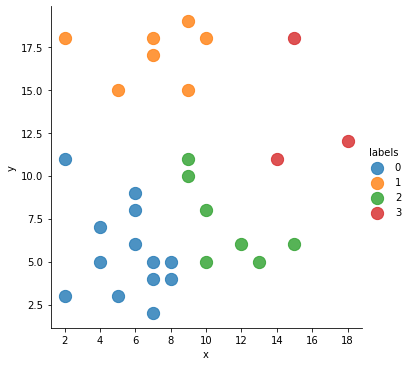

In [15]:
#  fit_reg=False 중간을 지나가는 선형
sns.lmplot(x='x',y='y', data=df, hue='labels', fit_reg=False, scatter_kws={'s':150}) 
plt.show()

##  최적의 군집분류 개수 찾기 .kminertia_
- km.inertia_  각 센터를 중심으로 떨어진 거리의 총합의 평균

In [18]:
# km.inertia_  각 센터를 중심으로 떨어진 거리의 총합의 평균 # 1-11 개를 만들어주는 함수
data = []
for n in range(1,15):
    model = KMeans(n_clusters= n)
    km = model.fit(df)
    data.append(km.inertia_ )

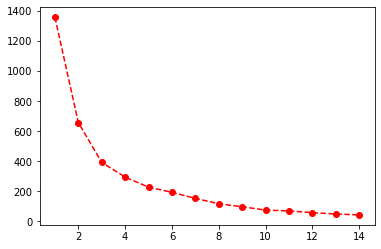

In [19]:
plt.plot( range(1,15), data, 'ro--') # 그래프
# 빨간색 : r, circle marker : o, -- : 파선
# 5정도에서 부터는 완만한 걸 볼 수 있다. 4< 최적의 군집분류 <6


---
## 연습문제

iris 데이터 특성데이터(sl,sw,pl,pw)를 이용하여 군집분류를 수행하고 pairplot을 그리고 실제값과 정확도를 확인하시오. inertia까지. 군집분류 3개.

In [20]:
from sklearn.datasets import load_iris

In [21]:
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [22]:
data = pd.DataFrame(iris['data'], columns=['sl','sw','pl','pw'])
target = pd.DataFrame(iris['target'])
data.head()

,sl,sw,pl,pw
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [23]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [24]:
data

,sl,sw,pl,pw
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


### 군집분류 수행

In [25]:
k = KMeans( n_clusters=3 )
km = k.fit(data)

In [26]:
km.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [27]:
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [28]:
(km.labels_ == iris['target']).mean() #kmeans랑 실제 군집분류랑 비교

0.24

### pairplot 수행 

In [29]:
data['labels'] = km.labels_

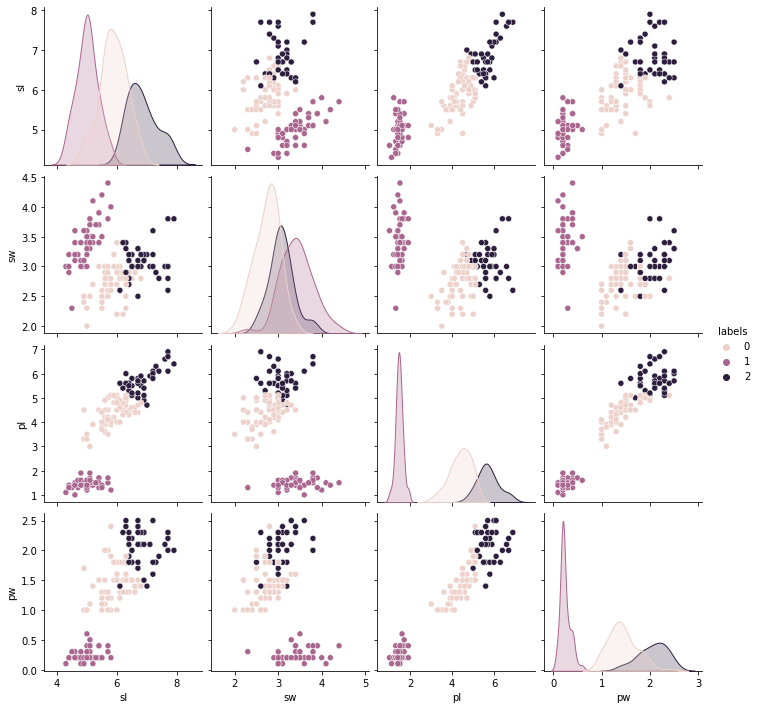

In [30]:
sns.pairplot(data, hue='labels')
plt.show()
# sns.lmplot(x='x',y='y', =data, hue='labels', fit_reg=False, scatter_kws={'s':150}) 

### inertia

In [31]:
mydata = []
for n in range(1,15):
    model = KMeans(n_clusters= n)
    km = model.fit(data)
    mydata.append(km.inertia_ )

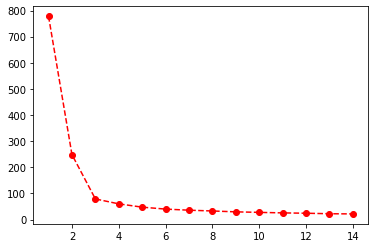

In [32]:
# (그래프로 그려보기)
plt.plot( range(1,15), mydata, 'ro--')
plt.show()

---